# MULTIPLE LINEAR REGRESSION

### Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.


## Dataset Description:
The dataset consists of the following variables:


Age: Age in years


KM: Accumulated Kilometers on odometer


FuelType: Fuel Type (Petrol, Diesel, CNG)


HP: Horse Power


Automatic: Automatic ( (Yes=1, No=0))


CC: Cylinder Volume in cubic centimeters


Doors: Number of doors


Weight: Weight in Kilograms


Quarterly_Tax:


Price: Offer Price in EUROs


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load Dataset
df = pd.read_csv("ToyotaCorolla - MLR.csv")

Taskes:


1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.


In [3]:
# EDA
df.head() #print first 5 rows

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.info() # give information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.describe() #give statistics infomartion of the data

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


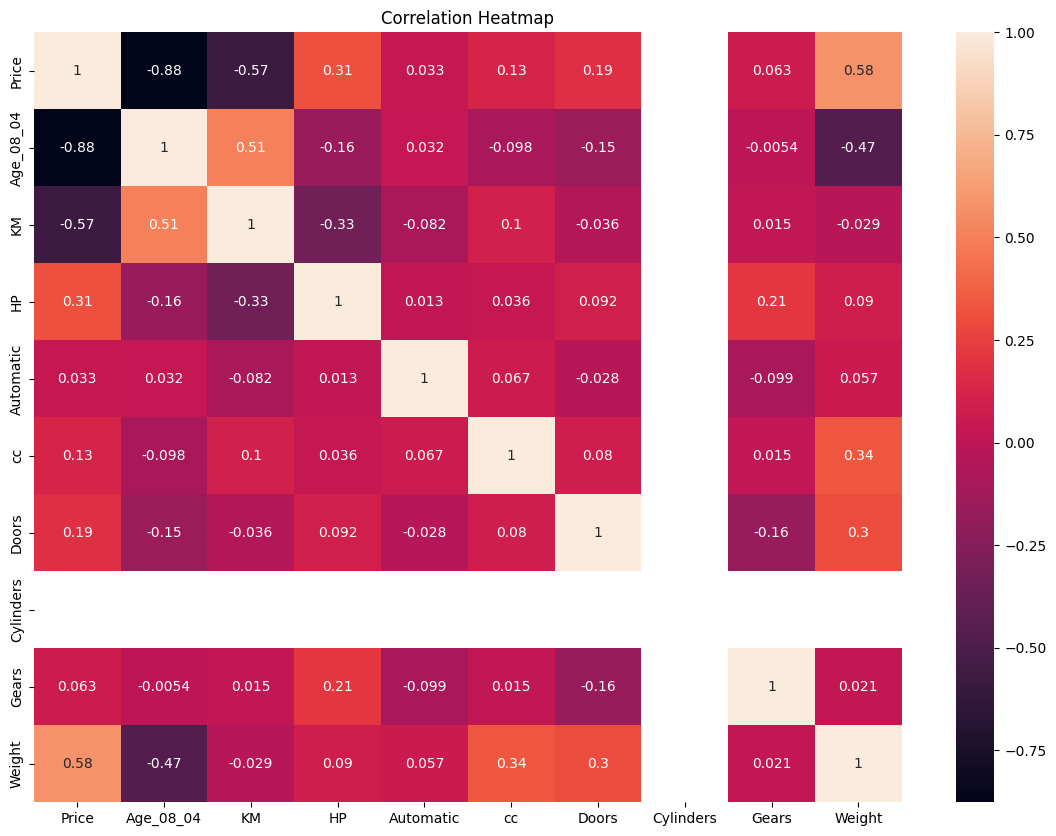

In [6]:
# Correlation heatmap for numeric columns
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True) #to getting to know about coorelation between features and target
plt.title("Correlation Heatmap")
plt.show()


In [7]:
## Dropp1ing these due low and not coorelation
df.drop(['Doors','Cylinders','Gears'], axis=1, inplace=True)
print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Weight
0  13500         23  46986    Diesel  90          0  2000    1165
1  13750         23  72937    Diesel  90          0  2000    1165
2  13950         24  41711    Diesel  90          0  2000    1165
3  14950         26  48000    Diesel  90          0  2000    1165
4  13750         30  38500    Diesel  90          0  2000    1170


In [9]:
# One hot encoding for fuel_drop column
df = pd.get_dummies(df, columns=['Fuel_Type'])
print(df.head())

   Price  Age_08_04     KM  HP  Automatic    cc  Weight  Fuel_Type_CNG  \
0  13500         23  46986  90          0  2000    1165          False   
1  13750         23  72937  90          0  2000    1165          False   
2  13950         24  41711  90          0  2000    1165          False   
3  14950         26  48000  90          0  2000    1165          False   
4  13750         30  38500  90          0  2000    1170          False   

   Fuel_Type_Diesel  Fuel_Type_Petrol  
0              True             False  
1              True             False  
2              True             False  
3              True             False  
4              True             False  


In [10]:
#Features and target separation
X = df.drop("Price", axis=1)## X=features
y = df["Price"] ##Y=target without features

<Axes: >

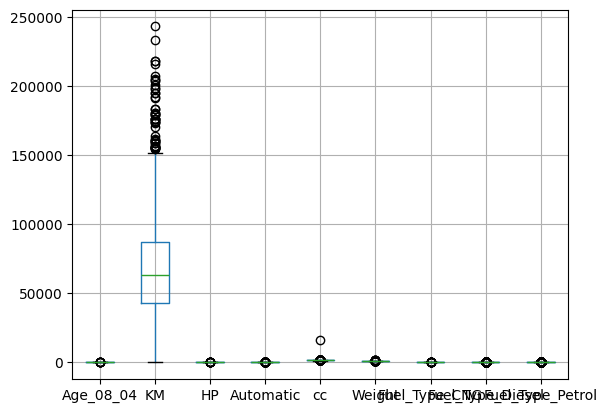

In [11]:
X.boxplot()#for outliers

In [12]:
def outlier_capping(df2, col): ##Removing Outliers
    Q1, Q3 = df2[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5* IQR, Q3 + 1.5  * IQR
    df2[col] = df2[col].clip(lower, upper)   # directly cap values using clip()

for col in X.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(X, col)

<Axes: >

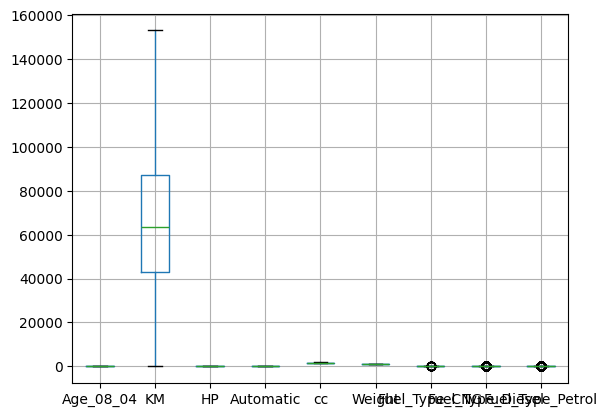

In [13]:
X.boxplot()## after removing outliers

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [14]:
#1Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) ##test_size=20 and train will be 80
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1148, 9) (288, 9) (1148,) (288,)


3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

In [15]:
 ## Build 3 different Models

# Model 1:(Age, KM, HP)
features1 = ["Age_08_04", "KM", "HP"]
model1 = LinearRegression()
model1.fit(X_train[features1], y_train)

LinearRegression()

In [16]:
# Model 2:(Age, KM, HP, CC, Weight)
features2 = ["Age_08_04", "KM", "HP", "cc", "Weight"]
model2 = LinearRegression()
model2.fit(X_train[features2], y_train)

LinearRegression()

In [17]:
X.columns

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Weight', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [18]:
# Model 3: Full Model (all features)
features3 = X.columns
model3 = LinearRegression()
model3.fit(X_train[features3], y_train)

LinearRegression()

In [35]:
# Show feature names and coefficients
print("Feature Coefficients:")
for i in range(len(X_train.columns)): #Goes till all features
    print(X_train.columns[i], ":", round(model3.coef_[i], 2)) #print column(feature names): and coef_ till 2 decimals


print("\nInterpretation:")
print("Positive value → Price increases when the feature increases.")
print("Negative value → Price decreases when the feature increases.")


Feature Coefficients:
Age_08_04 : -116.82
KM : -0.02
HP : 121.13
Automatic : -0.0
cc : -9.58
Weight : 29.18
Fuel_Type_CNG : -2709.54
Fuel_Type_Diesel : 3959.75
Fuel_Type_Petrol : -1250.21

Interpretation:
Positive value → Price increases when the feature increases.
Negative value → Price decreases when the feature increases.


| Feature              | Coefficient  | Meaning                                                                                                  |
| -------------------- | ------------ | -------------------------------------------------------------------------------------------------------- |
| Age_08_04       | -116.82  | As the car’s age increases by 1 year, the price decreases (older cars lose value).    |
| KM               | -0.02    | As kilometers driven increase, price slightly decreases (more usage = lower value).                  |
| HP               | +121.13 | Cars with higher horsepower (engine power) are more expensive.                                       |
| Automatic        | -0.0    | Gear type has no changes on price in this dataset.                                             |
| cc              | -9.58   | Higher engine capacity (cc) slightly reduces price. |
| Weight           | +29.18   | Heavier cars (larger or safer) are more valuable.                                              |
| Fuel_Type_CNG    | -2709.54 | CNG cars are about cheap than petrol cars.                                       |
| Fuel_Type_Diesel | +3959.75 | Diesel cars are more expensive than petrol cars.                                         |
| Fuel_Type_Petrol | -1250.21 | Petrol cars are about cheaper than average. |


4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [19]:
'''''To evaluate a regression model,
you use various performance metrics, with the most common being R-squared (R²),
 which indicates the proportion of variance in the dependent variable explained by the independent variables,
  and error metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE)
'''''

"''To evaluate a regression model,\nyou use various performance metrics, with the most common being R-squared (R²),\n which indicates the proportion of variance in the dependent variable explained by the independent variables,\n  and error metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE)\n"

In [20]:
# Model 1 Evaluation Here, we use R2 score, MSE , MAE
print("\nModel 1 (Age, KM, HP):")
y_pred_train1 = model1.predict(X_train[features1])
y_pred_test1  = model1.predict(X_test[features1])
print("Train R² :", r2_score(y_train, y_pred_train1))
print("Test R²  :", r2_score(y_test, y_pred_test1))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test1)))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test1))



Model 1 (Age, KM, HP):
Train R² : 0.8023622131052641
Test R²  : 0.797806025042757
Test RMSE: 1642.507690491347
Test MAE : 1125.4835267828846


In [21]:
# Model 2 Evaluation
print("\nModel 2 (Age, KM, HP, CC, Weight):")
y_pred_train2 = model2.predict(X_train[features2])
y_pred_test2  = model2.predict(X_test[features2])
print("Train R² :", r2_score(y_train, y_pred_train2))
print("Test R²  :", r2_score(y_test, y_pred_test2))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test2)))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test2))


Model 2 (Age, KM, HP, CC, Weight):
Train R² : 0.8424755461442922
Test R²  : 0.8309593468588867
Test RMSE: 1501.8234719377995
Test MAE : 1032.0810100127474


In [22]:
# Model 3 Evaluation
print("\nModel 3 (Full Model):")
y_pred_train3 = model3.predict(X_train[features3])
y_pred_test3  = model3.predict(X_test[features3])
print("Train R² :", r2_score(y_train, y_pred_train3))
print("Test R²  :", r2_score(y_test, y_pred_test3))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test3)))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test3))


Model 3 (Full Model):
Train R² : 0.856613716081352
Test R²  : 0.8618051539351375
Test RMSE: 1357.9045070737973
Test MAE : 982.1971759228327


5.Apply Lasso and Ridge methods on the model.

In [23]:
# Ridge regression
## To evaluate Lasso and Ridge regression models,
## we use common regression metrics like Root Mean Squared Error (RMSE) and R-squared with cross-validation, or Mean Squared Error (MSE)/ Mean abosoultr erro (MAE)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

print("\nRidge Regression Evaluation:")
y_pred_train_ridge = ridge.predict(X_train[features3])
y_pred_test_ridge  = ridge.predict(X_test[features3])
print("Train R² :", r2_score(y_train, y_pred_train_ridge))
print("Test R²  :", r2_score(y_test, y_pred_test_ridge))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test_ridge))

 ## The alpha parameter controls the regularization strength. A larger alpha value increases the penalty and leads to stronger regularization her we gave 1.0

# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print("\nLasso Regression Evaluation:")
y_pred_train_lasso = lasso.predict(X_train[features3])
y_pred_test_lasso  = lasso.predict(X_test[features3])
print("Train R² :", r2_score(y_train, y_pred_train_lasso))
print("Test R²  :", r2_score(y_test, y_pred_test_lasso))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)))
print("Test MAE :", mean_absolute_error(y_test, y_pred_test_lasso))



Ridge Regression Evaluation:
Train R² : 0.8564615267681313
Test R²  : 0.8593972539006053
Test RMSE: 1369.6834495783455
Test MAE : 986.4006383290766

Lasso Regression Evaluation:
Train R² : 0.8566135243013435
Test R²  : 0.861730718585353
Test RMSE: 1358.2701592415306
Test MAE : 982.3273115305581


Interview Questions:


1.What is Normalization & Standardization and how is it helpful?


2.What techniques can be used to address multicollinearity in multiple linear regression?


In [24]:
''' 1 : Normalization or Min-Max Scaling is used to transform features to be on a similar scale, usually 0 to 1,
Normalization is useful when there are no outliers as it cannot cope up with them.
## while Standardization transforms data to have a mean of 0 and a standard deviation of 1,
it translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively.
We can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.
Standardization does not get affected by outliers because there is no predefined range of transformed features '''

' 1 : Normalization or Min-Max Scaling is used to transform features to be on a similar scale, usually 0 to 1,\nNormalization is useful when there are no outliers as it cannot cope up with them.\n## while Standardization transforms data to have a mean of 0 and a standard deviation of 1,\nit translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively.\nWe can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected.\nStandardization does not get affected by outliers because there is no predefined range of transformed features '

In [25]:
'''2: To fix multicollinearity, one can remove one of the highly correlated variables, combine them into a single variable,
or use a dimensionality reduction technique such as principal component analysis to reduce the number of variables while retaining most of the information. '''

'2: To fix multicollinearity, one can remove one of the highly correlated variables, combine them into a single variable,\nor use a dimensionality reduction technique such as principal component analysis to reduce the number of variables while retaining most of the information. '




**Discussion:**
- The model assumes that numeric features like Age, KM, and Weight have linear effects on Price.
- One-hot encoding for Fuel_Type allows each fuel category to influence the target independently.
- Correlation heatmaptests can helped to ensure that multicollinearity is minimal.
